### Libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

### Reading file

In [4]:
df=pd.read_csv('../data/clean/startup_data_clean2.csv')
df.head()

,state_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
0,CA,San Diego,Bandsintown,1,1/1/2007,active,4/1/2009,1/1/2010,2.2493,3.0027,...,1,0,1,0,0,0,0,1.0000,0,1
1,CA,Los Gatos,TriCipher,1,1/1/2000,active,2/14/2005,12/28/2009,5.1260,9.9973,...,0,1,0,0,1,1,1,4.7500,1,1
2,CA,San Diego,Plixi,1,3/18/2009,active,3/30/2010,3/30/2010,1.0329,1.0329,...,0,0,0,1,0,0,0,4.0000,1,1
3,CA,Cupertino,Solidcore Systems,1,1/1/2002,active,2/17/2005,4/25/2007,3.1315,5.3151,...,0,0,0,0,1,1,1,3.3333,1,1
4,CA,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,...,0,1,1,0,0,0,0,1.0000,1,0


In [5]:
df.shape

(923, 41)

In [6]:
df.dtypes

state_code                   object
city                         object
name                         object
labels                        int64
founded_at                   object
closed_at                    object
first_funding_at             object
last_funding_at              object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate                 int64
category_code                object
is_software                   int64
is_web                        int64
is_mobile                     int64
is_enterprise                 int64
is_advertising                int64
is_gamesvideo               

In [7]:
df.describe()

,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,0.646804,2.235630,3.931456,2.967273,4.708687,7.710726,2.310943,2.541975e+07,1.841820,0.527627,...,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.646804
std,0.478222,2.510449,2.967910,2.727845,2.937226,7.265776,1.390922,1.896344e+08,1.322632,0.499507,...,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222
min,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.576700,1.669850,1.252100,2.930150,3.000000,1.000000,2.725000e+06,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000
75%,1.000000,3.575350,5.560250,4.002700,6.039750,10.000000,3.000000,2.472500e+07,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000
max,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df

,state_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
0,CA,San Diego,Bandsintown,1,1/1/2007,active,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1
1,CA,Los Gatos,TriCipher,1,1/1/2000,active,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1
2,CA,San Diego,Plixi,1,3/18/2009,active,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1
3,CA,Cupertino,Solidcore Systems,1,1/1/2002,active,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1
4,CA,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,San Francisco,CoTweet,1,1/1/2009,active,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000,1,1
919,MA,Burlington,Reef Point Systems,0,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667,1,0
920,CA,Sunnyvale,Paracor Medical,0,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000,1,0
921,CA,San Francisco,Causata,1,1/1/2009,active,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000,1,1


In [10]:
df.corr()

,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
labels,1.000000,-0.075637,0.073731,0.162766,0.240755,0.360434,0.206049,0.040176,0.328260,0.077217,0.059996,0.081735,-0.045309,-0.169067,0.012429,-0.000873,0.007312,0.073772,0.044355,-0.025893,-0.072193,0.000104,0.002373,-0.042408,-0.056515,-0.072840,0.184307,0.208257,0.165902,0.139940,0.185992,0.310652,1.000000
age_first_funding_year,-0.075637,1.000000,0.762382,0.480585,0.387489,-0.187817,-0.155478,0.046350,-0.295894,-0.010800,-0.128102,0.020279,0.032838,0.081031,0.116797,-0.166601,-0.054658,-0.047326,-0.071336,-0.063787,-0.071580,0.190653,-0.012596,0.115649,0.168140,-0.345985,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638,-0.075637
age_last_funding_year,0.073731,0.762382,1.000000,0.601585,0.556942,0.073080,0.385999,0.116371,-0.122905,0.006190,-0.143312,0.096325,0.014965,0.029313,0.116670,-0.216886,0.010886,0.006887,-0.056837,-0.078674,-0.108662,0.189788,0.029712,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727,0.073731
age_first_milestone_year,0.162766,0.480585,0.601585,1.000000,0.777499,0.246649,0.184552,0.064533,0.002321,0.033280,-0.085991,0.047105,0.006292,-0.010113,0.132005,-0.078210,-0.027734,0.000193,-0.001011,-0.085805,-0.078882,0.040378,0.049729,0.020114,0.095155,-0.252853,0.025181,0.181659,0.188309,0.235098,0.052229,0.143892,0.162766
age_last_milestone_year,0.240755,0.387489,0.556942,0.777499,1.000000,0.333307,0.241757,0.093739,0.283366,0.056218,-0.085233,0.028548,0.010668,-0.029840,0.070055,-0.015751,0.020814,0.003964,0.010055,-0.052087,-0.102206,-0.003693,0.037945,-0.005578,0.079253,-0.229916,0.108699,0.244027,0.252747,0.234336,0.077519,0.185094,0.240755
relationships,0.360434,-0.187817,0.073080,0.246649,0.333307,1.000000,0.358883,0.093790,0.513835,0.105754,0.049912,-0.004689,-0.012779,-0.157843,-0.087759,0.042207,0.034052,0.089621,0.110820,0.016851,-0.031035,-0.068248,0.078289,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207,0.360434
funding_rounds,0.206049,-0.155478,0.385999,0.184552,0.241757,0.358883,1.000000,0.115800,0.230162,0.010258,0.007431,0.079527,-0.018921,-0.062794,-0.017969,-0.091871,0.104287,0.078839,-0.000867,-0.003951,-0.051723,0.018321,0.028304,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345,0.206049
funding_total_usd,0.040176,0.046350,0.116371,0.064533,0.093739,0.093790,0.115800,1.000000,0.012056,-0.027545,-0.024488,-0.005667,-0.003988,0.057764,-0.018932,-0.030426,0.107388,-0.010946,-0.015013,-0.011830,-0.010790,0.026082,-0.001829,-0.011932,0.010060,-0.059650,-0.023721,0.020119,0.045405,0.045146,0.046250,0.048978,0.040176
milestones,0.328260,-0.295894,-0.122905,0.002321,0.283366,0.513835,0.230162,0.012056,1.000000,0.036172,0.104795,0.017559,-0.032863,-0.123909,-0.156038,0.175672,0.127427,0.083657,0.064852,0.071892,0.004819,-0.181104,0.006833,-0.136482,-0.093338,0.128255,0.319986,0.195162,0.085329,0.020663,0.043533,0.171412,0.328260
is_CA,0.077217,-0.010800,0.006190,0.033280,0.056218,0.105754,0.010258,-0.027545,0.036172,1.000000,-0.380683,-0.332216,-0.230759,-0.562953,-0.039258,0.024052,-0.020809,-0.028279,0.002489,0.042951,-0.056024,0.023742,-0.022224,0.031408,-0.068587,-0.059741,0.076151,0.093337,0.074752,0.083008,0.069158,0.098677,0.077217


In [11]:
corr_matrix=df.corr()
corr_matrix["is_acquired"].sort_values(ascending=False)

labels                      1.000000
is_acquired                 1.000000
relationships               0.360434
milestones                  0.328260
is_top500                   0.310652
age_last_milestone_year     0.240755
has_roundB                  0.208257
funding_rounds              0.206049
avg_participants            0.185992
has_roundA                  0.184307
has_roundC                  0.165902
age_first_milestone_year    0.162766
has_roundD                  0.139940
is_MA                       0.081735
is_CA                       0.077217
is_enterprise               0.073772
age_last_funding_year       0.073731
is_NY                       0.059996
is_advertising              0.044355
funding_total_usd           0.040176
is_software                 0.012429
is_mobile                   0.007312
is_consulting               0.002373
is_biotech                  0.000104
is_web                     -0.000873
is_gamesvideo              -0.025893
is_othercategory           -0.042408
i

looks like labels are the same as is_acquired, I will drop the column

In [12]:
df = df.drop(['labels'],  axis=1)

In [13]:
corr_matrix=df.corr()
corr_matrix["is_acquired"].sort_values(ascending=False)

is_acquired                 1.000000
relationships               0.360434
milestones                  0.328260
is_top500                   0.310652
age_last_milestone_year     0.240755
has_roundB                  0.208257
funding_rounds              0.206049
avg_participants            0.185992
has_roundA                  0.184307
has_roundC                  0.165902
age_first_milestone_year    0.162766
has_roundD                  0.139940
is_MA                       0.081735
is_CA                       0.077217
is_enterprise               0.073772
age_last_funding_year       0.073731
is_NY                       0.059996
is_advertising              0.044355
funding_total_usd           0.040176
is_software                 0.012429
is_mobile                   0.007312
is_consulting               0.002373
is_biotech                  0.000104
is_web                     -0.000873
is_gamesvideo              -0.025893
is_othercategory           -0.042408
is_TX                      -0.045309
h

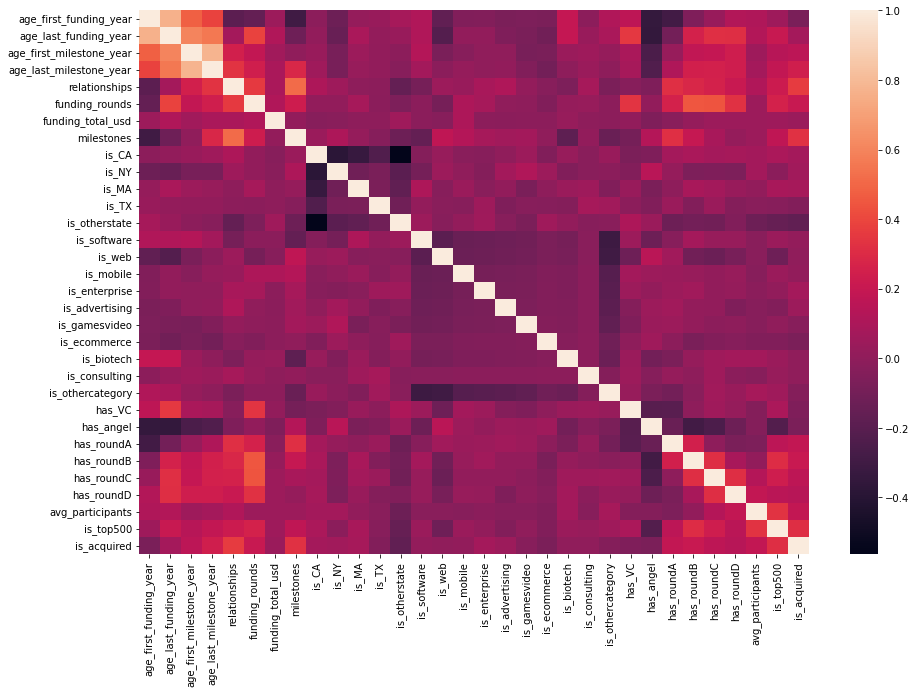

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, ax = ax)
plt.show()

In [15]:
df['is_acquired'].value_counts()

1    597
0    326
Name: is_acquired, dtype: int64

In [16]:
df.to_csv('startup_data_clean2.csv', header=True, index=False)

Data is imbalanced, I will need to work on that.

Data exploration is further explored with Tableau.